In [1]:
%load_ext autoreload
%autoreload 2

# Placeholder graphs
Graphs with dummy data

# Resources
- https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns

In [3]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set(context="talk", style="ticks", font_scale=1.5)

In [4]:
style.available

['seaborn-notebook',
 '_classic_test',
 'bmh',
 'seaborn-dark',
 'seaborn-bright',
 'grayscale',
 'tableau-colorblind10',
 'dark_background',
 'seaborn-pastel',
 'seaborn-white',
 'seaborn-muted',
 'Solarize_Light2',
 'fast',
 'seaborn',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-paper',
 'ggplot',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'seaborn-deep',
 'fivethirtyeight',
 'classic']

In [5]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

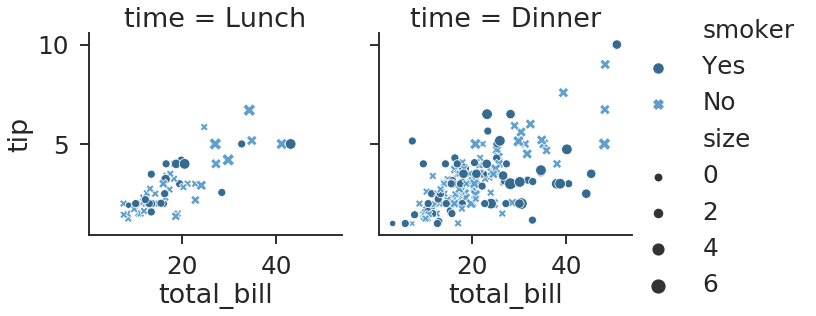

In [6]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips, palette=("Blues_d"));

# Chapter 0: Overview

In [7]:
benchmarks = ["500.perlbench_r", "502.gcc_r", "503.bwaves_r", "527.cam4_r", "541.leela_r", "549.fotonik3d_r", "554.roms_r", "557.xz_r"]
classifiers = ["SimPoint", "BBV", "INS", "BR", "PROC"]
colors = {
    "SimPoint": "blue",
    "BBV": "red",
    "INS": "green",
    "BR": "orange",
    "PROC": "purple"
}

## Why are phases important?

In [8]:
scaling_data = pd.read_csv("./csv/scaling.csv")
scaling_data.Scale = scaling_data.Scale.astype(str)

In [9]:
scaling_data

,Scale,TAGE 8KB,TAGE 64KB,Perfect BP,Perfect BP & L1D
0,1,1.00,1.01,1.20,1.50
1,2,1.25,1.27,1.65,2.10
2,4,1.46,1.49,2.04,2.60
3,8,1.60,1.64,2.35,3.04
4,16,1.70,1.75,2.60,3.42
5,32,1.74,1.80,2.80,3.60


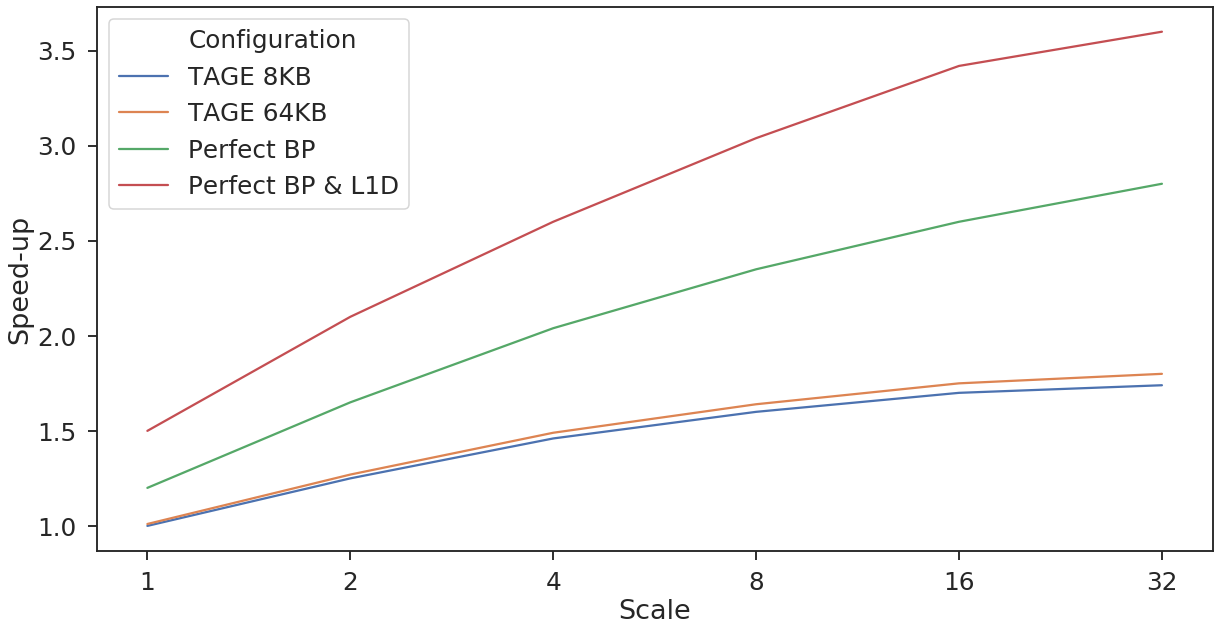

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.lineplot(data=pd.melt(scaling_data, ["Scale"], var_name="Configuration", value_name="Speed-up"), ax=ax, x="Scale",y="Speed-up", hue="Configuration", sort=False)

# Chapter 1: Techniques for online phase classification

## 1. How well does the classifier aid adaptation?

In [11]:
energy_bwaves_data = pd.read_csv("./csv/energy_bwaves.csv")

In [12]:
energy_bwaves_data

,Classifier,KJ
0,Original,34.415
1,SimPoint,35.430
2,BBV,34.100
3,INS,32.500
4,BR,28.100
5,PROC,29.500


Text(0, 0.5, 'Total Energy (KJ)')

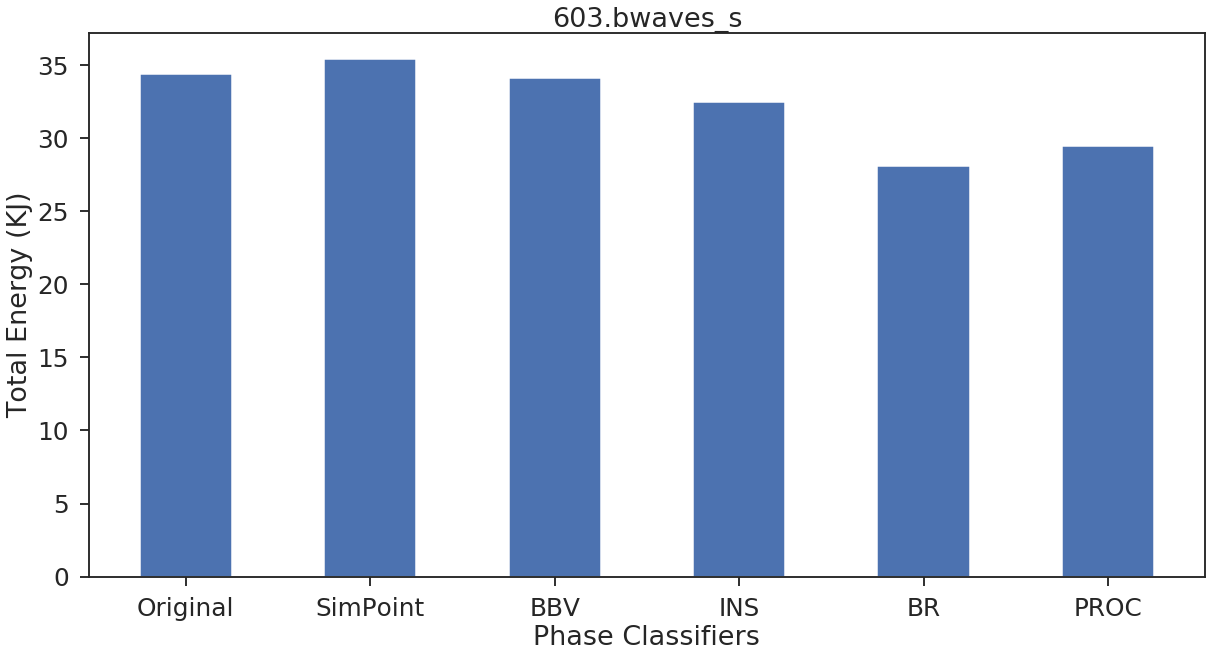

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(energy_bwaves_data.Classifier, energy_bwaves_data.KJ, width=0.5)
plt.title("603.bwaves_s")
plt.xlabel("Phase Classifiers")
plt.ylabel("Total Energy (KJ)")

In [14]:
energy_data = np.random.rand(len(classifiers), len(benchmarks))

In [15]:
energy_data

array([[0.59645147, 0.66214498, 0.81823198, 0.86815828, 0.03265574,
        0.072824  , 0.8438233 , 0.58537296],
       [0.55085595, 0.28993427, 0.38792991, 0.71465057, 0.09990723,
        0.38656086, 0.55253086, 0.35465314],
       [0.15215444, 0.46780459, 0.66244801, 0.47643654, 0.06612469,
        0.22311004, 0.77604457, 0.36600119],
       [0.95470639, 0.91699641, 0.99172855, 0.02247607, 0.88210698,
        0.47930681, 0.0244823 , 0.65807783],
       [0.89748502, 0.63660493, 0.69315573, 0.42309801, 0.52831966,
        0.2456497 , 0.82820441, 0.20334989]])

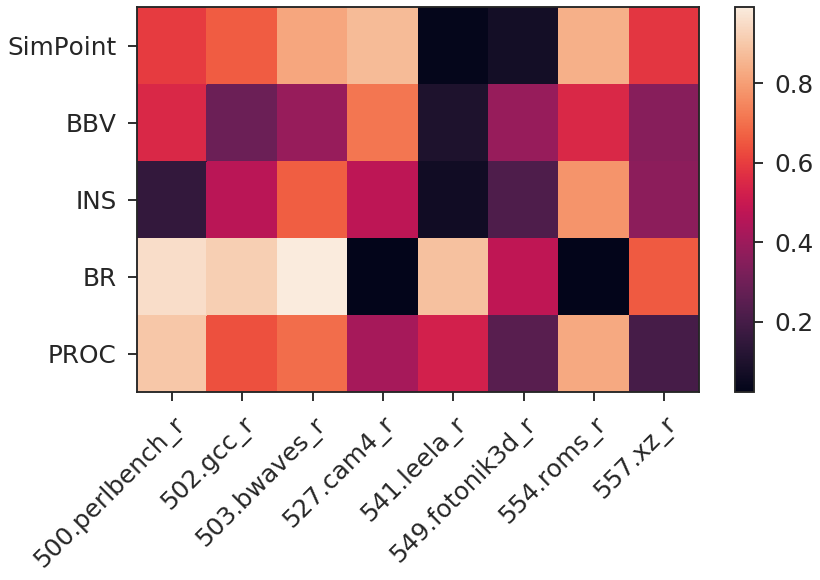

In [16]:
fig, ax = plt.subplots()

# We want to show all ticks...
ax.set_xticks(np.arange(len(benchmarks)))
ax.set_yticks(np.arange(len(classifiers)))

# ... and label them with the respective list entries
ax.set_xticklabels(benchmarks)
ax.set_yticklabels(classifiers)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()

ax.set_xticks(np.arange(energy_data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(energy_data.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

plt.colorbar(plt.pcolor(energy_data))

In [17]:
bp_bwaves_data = pd.read_csv("./csv/bp_bwaves.csv")

In [18]:
energy_bwaves_data

,Classifier,KJ
0,Original,34.415
1,SimPoint,35.430
2,BBV,34.100
3,INS,32.500
4,BR,28.100
5,PROC,29.500


Text(0, 0.5, 'Mispredicts per 1K instructions (MPKI)')

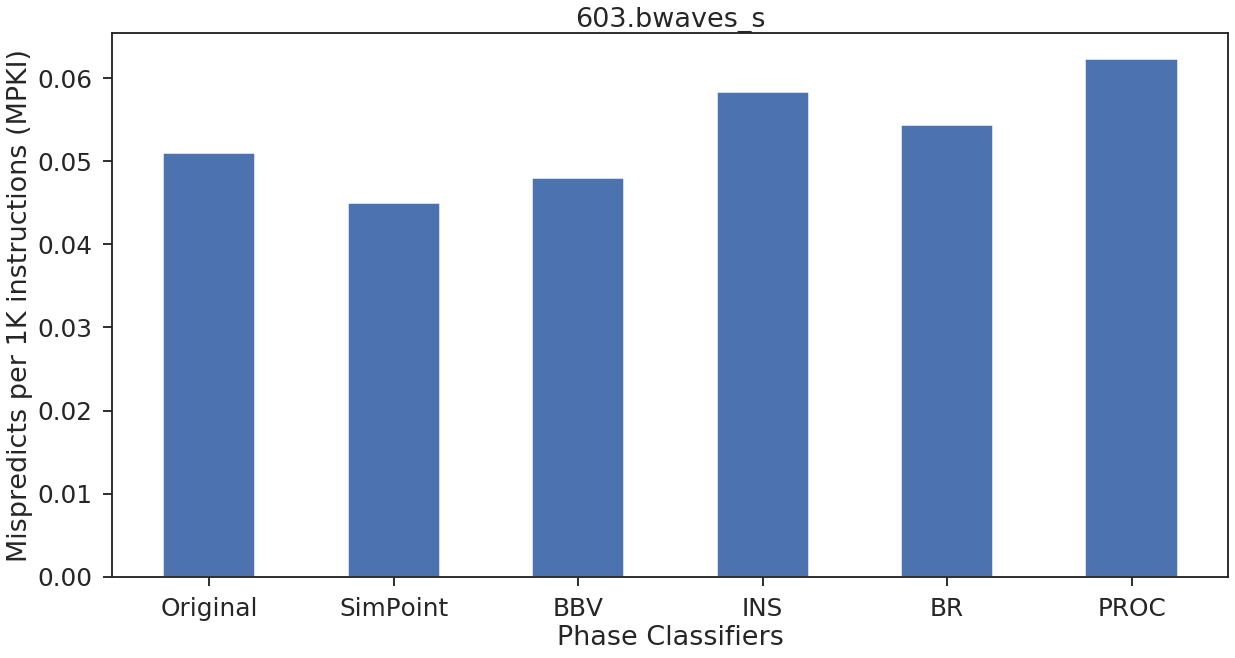

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(bp_bwaves_data.Classifier, bp_bwaves_data.MPKI, width=0.5)
plt.title("603.bwaves_s")
plt.xlabel("Phase Classifiers")
plt.ylabel("Mispredicts per 1K instructions (MPKI)")

## 2. How well were phases detected

In [20]:
raw_detection_data = pd.read_csv("./csv/detection.csv", sep="\t")
detection_data = raw_detection_data.pct_change()

In [21]:
detection_data

,SimPoint,BBV,INS,BR,PROC
0,NaN,NaN,NaN,NaN,NaN
1,-0.005197,-0.003164,-0.003026,0.002176,-0.022058
2,0.030152,0.025937,0.022049,0.018077,0.019183
3,-0.041783,-0.032261,-0.028896,-0.016345,-0.026287
4,-0.000983,-0.001387,0.003274,-0.005437,-0.002181
...,...,...,...,...,...
995,0.008249,0.004794,0.006539,0.003956,0.004313
996,-0.026706,-0.016438,0.002018,-0.009068,-0.017214
997,0.010233,0.006325,-0.013587,0.002255,0.030371
998,-0.005836,-0.003293,0.029058,0.003832,-0.026871


In [22]:
threshold = 0.02

In [23]:
label_name = "SimPoint"

In [24]:
label = abs(detection_data[label_name]) > threshold

In [25]:
label.value_counts()

False    691
True     309
Name: SimPoint, dtype: int64

In [26]:
tmp = abs(detection_data) > 0.02

In [27]:
tmp

,SimPoint,BBV,INS,BR,PROC
0,False,False,False,False,False
1,False,False,False,False,True
2,True,True,True,False,False
3,True,True,True,False,True
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,True
998,False,False,True,False,True


In [28]:
tmp.SimPoint.value_counts()

False    691
True     309
Name: SimPoint, dtype: int64

In [29]:
tmp.BBV.value_counts()

False    813
True     187
Name: BBV, dtype: int64

In [30]:
tmp.eq(label, axis="index").SimPoint.value_counts()

True    1000
Name: SimPoint, dtype: int64

In [31]:
tmp.eq(label, axis="index").BBV.value_counts()

True     826
False    174
Name: BBV, dtype: int64

### True positive

In [32]:
tmp.__and__(label, axis="index").SimPoint.value_counts()

False    691
True     309
Name: SimPoint, dtype: int64

In [33]:
tmp.__and__(label, axis="index").BBV.value_counts()

False    839
True     161
Name: BBV, dtype: int64

### True negative

In [34]:
(~tmp).__and__(~label, axis="index").SimPoint.value_counts()

True     691
False    309
Name: SimPoint, dtype: int64

In [35]:
(~tmp).__and__(~label, axis="index").BBV.value_counts()

True     665
False    335
Name: BBV, dtype: int64

In [36]:
(~tmp).__and__(~label, axis="index").BBV.value_counts()[True]

665

### False positive

In [37]:
tmp.__and__(~label, axis="index").PROC.value_counts()

False    869
True     131
Name: PROC, dtype: int64

### False negative

In [38]:
(~tmp).__and__(label, axis="index").PROC.value_counts()

False    861
True     139
Name: PROC, dtype: int64

### Graph
- For each threshold, compute true positive and false positive
- Organize data as dictionary with classifiers as keys and true/false positive rate data frames

In [39]:
label_thresh = 0.02
label_name = "SimPoint"
label = abs(detection_data[label_name]) > label_thresh

# Get counts of actual positives and actual negatives
cond_pos, cond_neg = label.value_counts()

In [40]:
print(cond_pos, cond_neg)

691 309


In [41]:
results = {}
for col in detection_data:
    results[col] = []
    
for thresh in np.linspace(0, 0.1, num = 101):
    
    # Threshold data
    data = abs(detection_data) > thresh
    tp = data.__and__(label, axis="index")
    fp = data.__and__(~label, axis="index")

    for classifier in data:
        tpr, fpr = 0, 0
        
        tp_vc = tp[classifier].value_counts()
        fp_vc = fp[classifier].value_counts()
        
        if True in tp_vc:
            tpr = tp_vc[True] / cond_pos
        if True in fp_vc:
            fpr = fp_vc[True] / cond_neg

        results[classifier].append({"tpr": tpr, "fpr": fpr})

Text(0, 0.5, 'True positive rate')

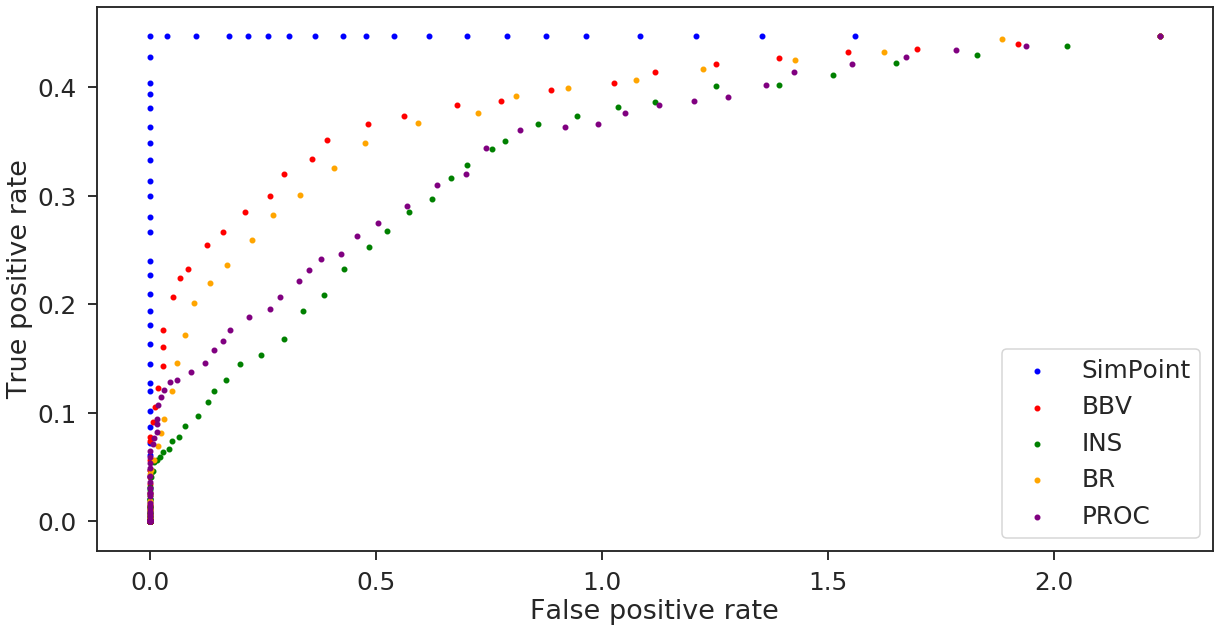

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

for col in detection_data:
#     if col == "SimPoint":
#         continue
    data = pd.DataFrame.from_records(results[col])
    data.plot.scatter(x="fpr", y="tpr", color=colors[col], ax=ax, label=col)
    
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

## 3. How well were phases classified

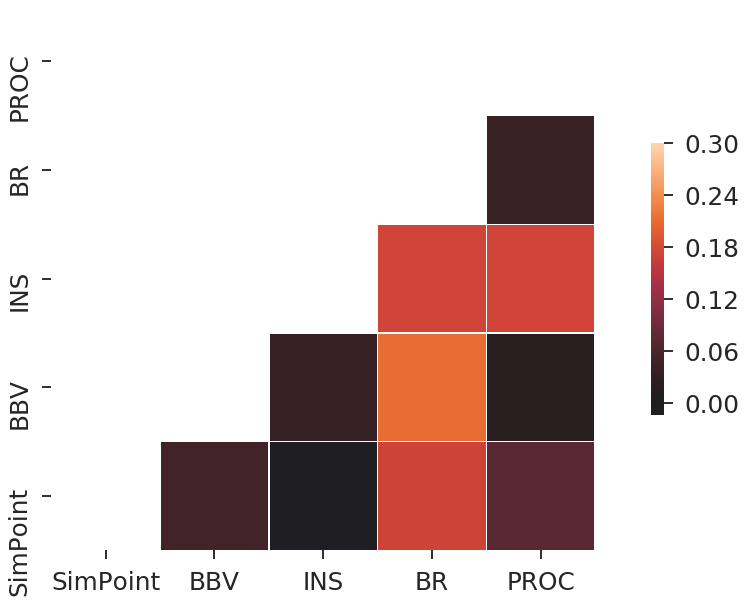

In [52]:
from string import ascii_letters

# sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, len(classifiers))),
                 columns=classifiers)

# Compute the correlation matrix
corr = d.corr().iloc[::-1, :]

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
mask[(np.triu_indices_from(mask)[0], 4 - np.triu_indices_from(mask)[1])] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 5. How long/stable are the phases

### Stability

In [58]:
stability_data = pd.read_csv("./csv/stability.csv", sep="\t")

In [59]:
stability_data

,SimPoint,BBV,INS,BR,PROC
0,63.650144,24.0,38.0,44.300000,60.0
1,64.596791,39.0,53.0,53.400000,61.0
2,63.876748,48.0,55.0,56.000000,63.0
3,69.027538,54.0,59.0,59.000000,66.0
4,70.404641,59.0,60.0,59.615679,67.0
5,69.702777,63.0,61.2,59.242779,68.0
6,71.232799,67.0,62.0,61.226969,68.3
7,70.781106,70.0,63.5,61.681983,68.6
8,80.240394,72.0,64.5,62.795548,68.8
9,77.842052,73.7,66.0,64.500000,69.0


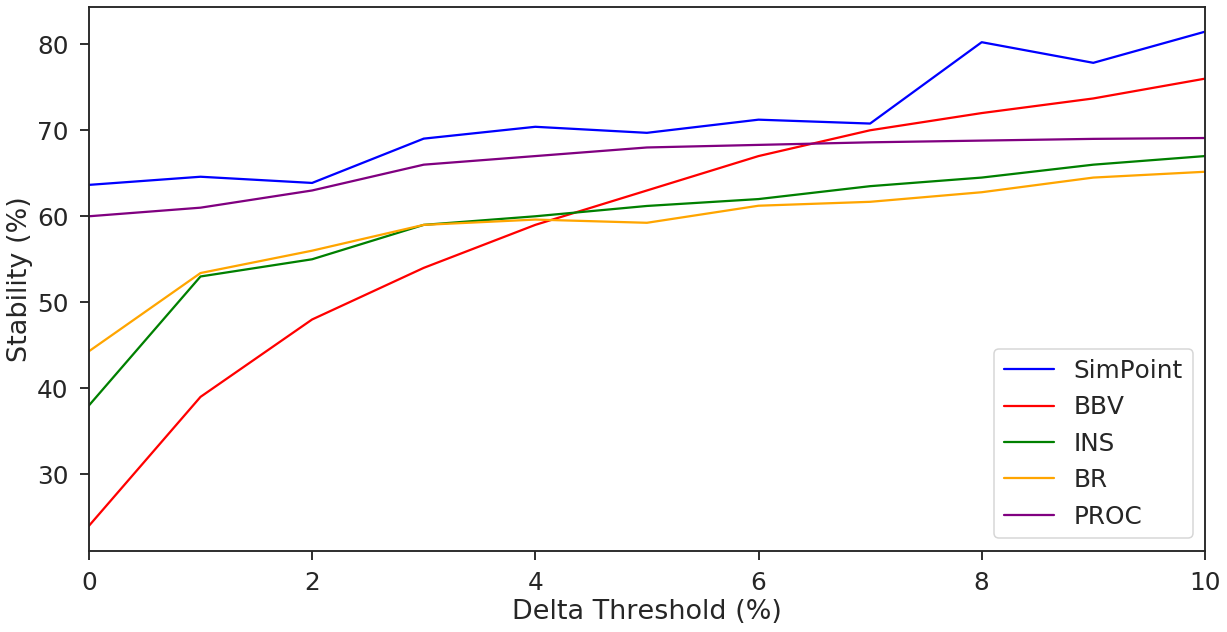

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

for col in stability_data:
    stability_data[col].plot.line(color=colors[col], ax=ax, label=col)
    
plt.xlabel("Delta Threshold (%)")
plt.ylabel("Stability (%)")
plt.legend()

### Length

In [69]:
length_data = pd.read_csv("./csv/length.csv", sep="\t")

In [70]:
length_data

,SimPoint,BBV,INS,BR,PROC
0,8.327689,0.0,4.5,4.56,9.40
1,8.712689,4.3,5.4,5.40,9.20
2,9.262689,5.1,6.1,6.10,9.50
3,9.757689,5.8,6.4,6.90,10.10
4,10.384689,6.1,7.4,7.60,10.24
5,10.478189,6.4,7.5,7.60,10.31
6,10.687189,6.8,7.9,7.80,10.29
7,10.659689,7.1,7.8,7.60,10.34
8,10.500189,7.8,7.5,7.50,10.35
9,10.852189,8.9,8.1,7.40,10.39


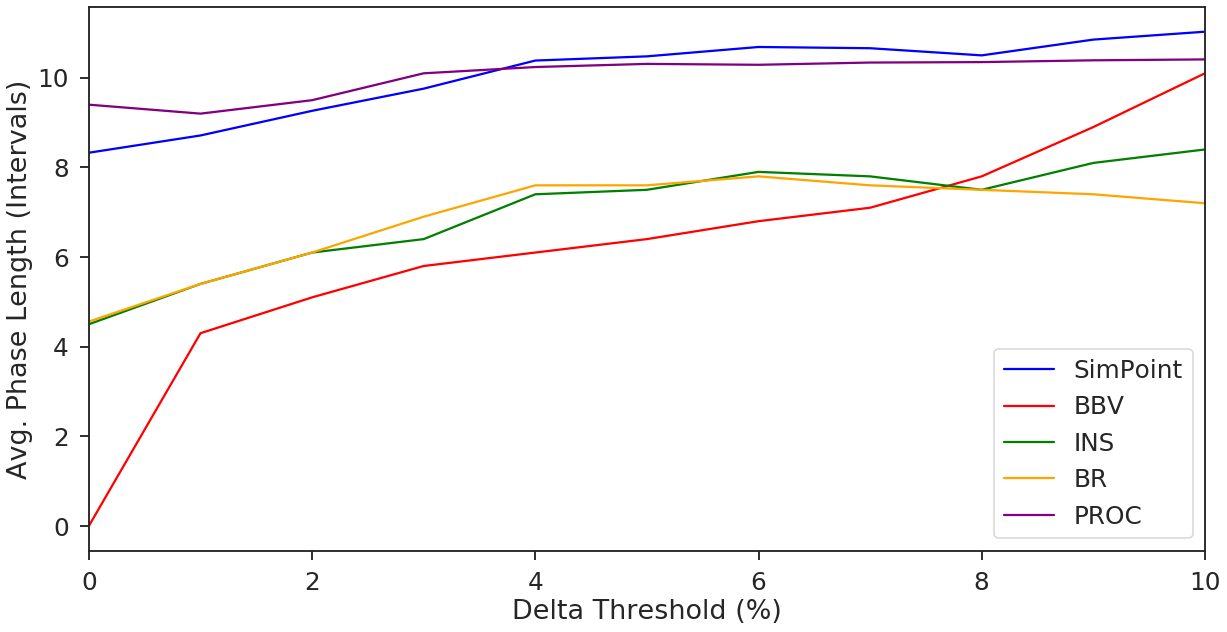

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

for col in length_data:
    length_data[col].plot.line(color=colors[col], ax=ax, label=col)
    
plt.xlabel("Delta Threshold (%)")
plt.ylabel("Avg. Phase Length (Intervals)")
plt.legend()

## 6. How representative are the phases

In [76]:
representative_data = pd.read_csv("./csv/representative.csv", sep="\t", index_col=0)

In [94]:
representative_data

,Start 0,Start 1bn,BBV
gzip,68,13,4
gcc,51,33,8
bwaves,57,34,11
med,58,23,2
max,100,100,11


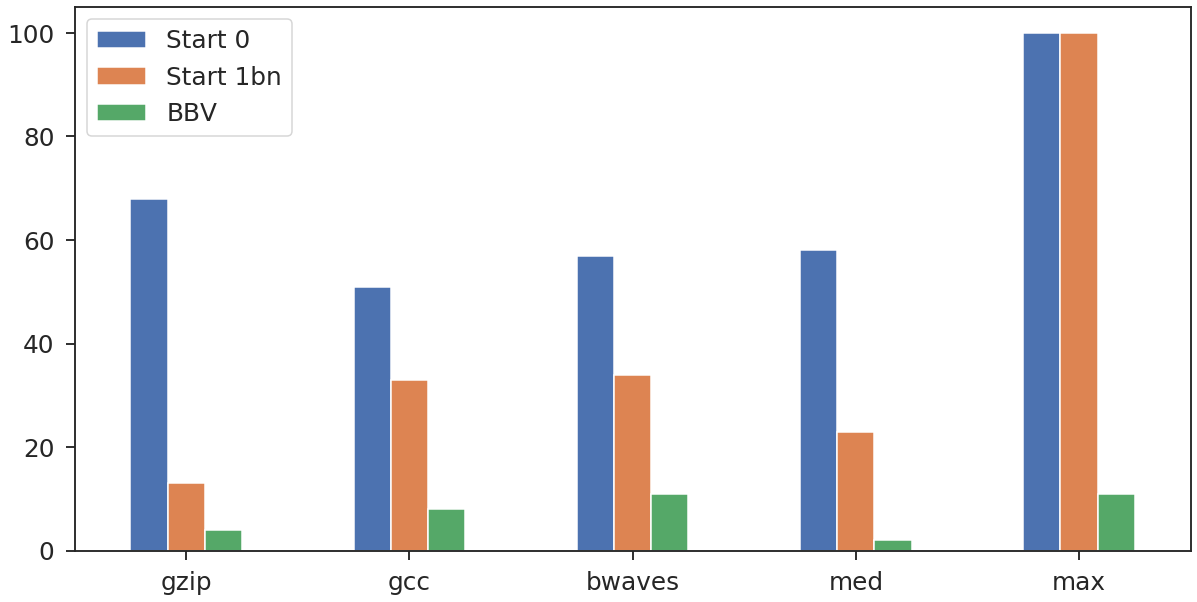

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

representative_data.plot.bar(rot=0, ax=ax)